<a href="https://colab.research.google.com/github/brahmjeetg/Exploratory-Data-Analysis/blob/main/Bank%20Churn%20Data/Bank_Churn_Data_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.getcwd()
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'
!pip install kaggle

In [2]:
os.listdir()

['.config', 'drive', 'sample_data']

In [3]:
!kaggle datasets download -d sakshigoyal7/credit-card-customers

  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 50.5MB/s]


In [4]:
os.listdir()

['.config', 'credit-card-customers.zip', 'drive', 'sample_data']

In [5]:
zip_path = '/content/credit-card-customers.zip'

In [6]:
os.getcwd()

'/content'

In [7]:

!cp '{zip_path}' .

cp: '/content/credit-card-customers.zip' and './credit-card-customers.zip' are the same file


In [8]:
!unzip -q 'credit-card-customers.zip'

In [9]:
os.listdir()

['.config',
 'BankChurners.csv',
 'credit-card-customers.zip',
 'drive',
 'sample_data']

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [11]:
churn = pd.read_csv('/content/BankChurners.csv', usecols=list(range(21)))

In [12]:
print(churn.shape) 

(10127, 21)


In [13]:
churn.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [14]:
churn['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [15]:
churn['Attrition_Flag'].replace({'Existing Customer' :0, 'Attrited Customer':1}, inplace=True)

In [16]:
churn['Attrition_Flag'].value_counts(normalize=True)

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

In [17]:
churn[['Attrition_Flag', 'Gender', 'Marital_Status']].groupby(['Gender', 'Marital_Status']).mean().round(2)

Attrition_Flag
Gender Marital_Status                
F      Divorced                  0.17
       Married                   0.17
       Single                    0.18
       Unknown                   0.18
M      Divorced                  0.15
       Married                   0.13
       Single                    0.16
       Unknown                   0.16

In [18]:
churn[['Attrition_Flag', 'Customer_Age', 'Dependent_count']].groupby(['Attrition_Flag']).mean().round(2)

,Customer_Age,Dependent_count
Attrition_Flag,,
0,46.26,2.34
1,46.66,2.40


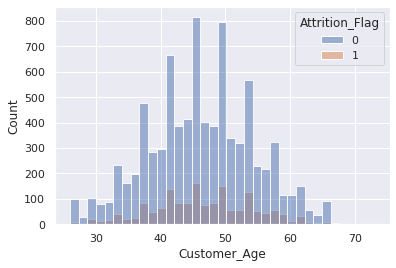

In [19]:
sns.histplot(data=churn,bins=35, x='Customer_Age', hue='Attrition_Flag')

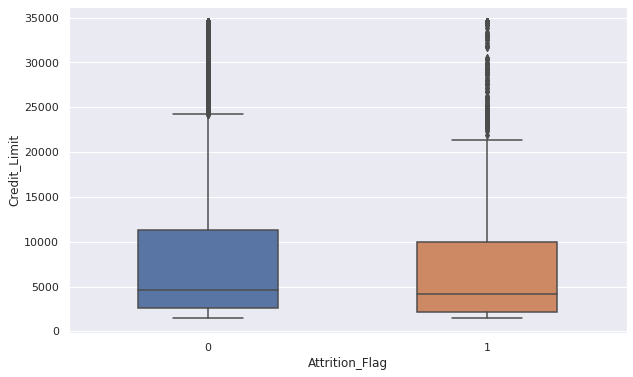

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn, y='Credit_Limit', x='Attrition_Flag', width=0.5 )

In [21]:
churn[['Attrition_Flag', 'Months_Inactive_12_mon']].groupby(['Months_Inactive_12_mon']).agg(['mean', 'count']).round(2)

Attrition_Flag      
                                 mean count
Months_Inactive_12_mon                     
0                                0.52    29
1                                0.04  2233
2                                0.15  3282
3                                0.21  3846
4                                0.30   435
5                                0.18   178
6                                0.15   124

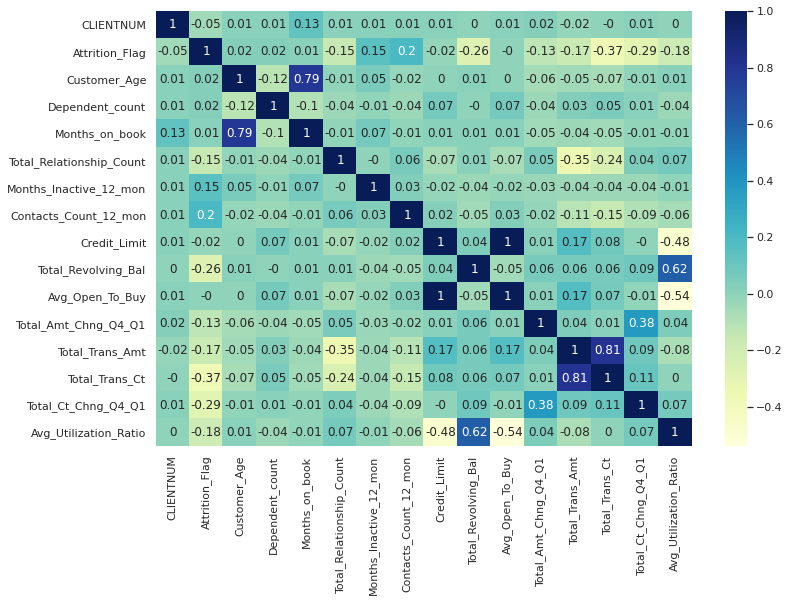

In [27]:
corr = churn.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [28]:
corr_target  = abs(corr['Attrition_Flag']).sort_values(ascending=False)
corr_target

Attrition_Flag              1.00
Total_Trans_Ct              0.37
Total_Ct_Chng_Q4_Q1         0.29
Total_Revolving_Bal         0.26
Contacts_Count_12_mon       0.20
Avg_Utilization_Ratio       0.18
Total_Trans_Amt             0.17
Months_Inactive_12_mon      0.15
Total_Relationship_Count    0.15
Total_Amt_Chng_Q4_Q1        0.13
CLIENTNUM                   0.05
Credit_Limit                0.02
Dependent_count             0.02
Customer_Age                0.02
Months_on_book              0.01
Avg_Open_To_Buy             0.00
Name: Attrition_Flag, dtype: float64

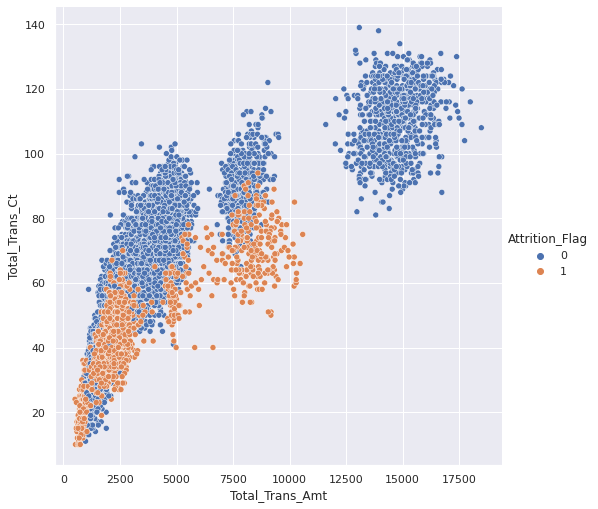

In [30]:
sns.relplot(data=churn, kind='scatter', x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Attrition_Flag', height=7)

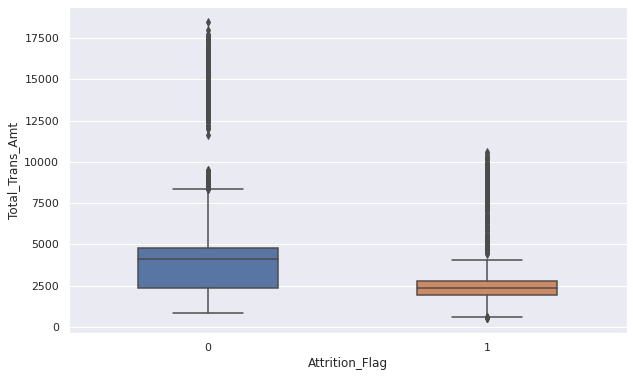

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=churn, y='Total_Trans_Amt', x='Attrition_Flag', width=0.5)